* İlk classification algoritması olan logistic regression ile başlayalım.
* Classıfıcatıon algoritması 0'ları 1'leri öğrenir sonra farklı bir fotoğrafra 0 ve 1'i tahmin eder
* Kedi köpek sınıflandırması örnek olarak verilebilir.
* Deep learningin temelidir.
![resim](7.jpg)

* Her bir kare bir pixeldir.
<br>


![resim](8.jpg)
![resim](9.jpg)

* np array 1 2 3 4 5 .......
* .........................
* ..................... 4096 diye dizilir
* boyutu 4096*1 lik numpy array oluyor
* 64*64 luk resmi numpy arraye çevirdik daha sonra da bunu lojistil regresyon yapmak için kullanıcaz
* bir resmi train etmek için hazırlık yapıyoruz yani 

* Computation graph  matematiksel ifadeleri görselleştirmek için bir yöntemdir.
* Lojistik regresyonu anlatırken bu computation graph üzerinden gidicez.

![resim](10.jpg)

- 4096 tane feature train edicez bu resim için modelimize
- Parameters are weight and bias.
- Weights: coefficients of each pixels
- Bias: intercept
- z = (w.t)x + b => z equals to (transpose of weights times input x) + bias
- In an other saying => z = b + px1w1 + px2w2 + ... + px4096*w4096
- y_head = sigmoid(z)
- Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.
- Why we use sigmoid function?
- It gives probabilistic result
- It is derivative so we can use it in gradient descent algorithm (we will see as soon.)
- Lets make example:
- Lets say we find z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification - result is 1 with 90% probability.
- Now lets start with from beginning and examine each component of computation graph more detailed.

 - y= a0 + a1*x de a0 bias a1 de katsayı
 - sigmoid function : aktivasyon fonksiyonu olarak geçer ve 0 ile 1 arasına değeri sokar. Ayrıca türevi alınabilen bir değer biraz da o yüzden kullanırız. w1 w2 ... değerleri bu sayede güncellenebilir.
 - Türevi alınamayan bir şey kullanırsak weight ve bias değerlerini güncelleyemeyiz.
 - 0,5 diye threshold koyuyorum mesela 0.5'ten büyükler 1 küçükler 0 gibi
 - z = -2 olsun mesela tabloya göre 0.1 geliyor sonuç . 0.5ten küçük old için 0 derim
 - Soru 1 : Yanlış tajminde ne yaoılır ?
 - Soru 2 : weight ve bias değerleri ilk olarak neye göre belirlenir? ---> Rastgele atanır yanlış tahmin edince terse doğru gidip türev alınıp bias ve weight değerleri güncellenir. Weight ve bias güncelleye güncelleye tüm resimleri eğitiyoruz. TTüm resimlere göre eğitilmiş modelimizi buluyoruz. En sondaki weight ve bias bizim modelin katsayıları olur.
 - Soru 3 : tüm fotoğrafları nasıl modelimize sokucaz ?

- weight ve bias değerlerini ilk başta nasıl seçtiğimie bakalım
- 
## Initializing parameters
- As you know input is our images that has 4096 pixels(each image in x_train).
- Each pixels have own weights.
- The first step is multiplying each pixels with their own weights.
- The question is that what is the initial value of weights?
- There are some techniques that I will explain at artificial neural network but for this time initial weights are 0.01.
- Okey, weights are 0.01 but what is the weight array shape? As you understand from computation graph of logistic regression, - it is (4096,1)
- Also initial bias is 0.
- Lets write some code. In order to use at coming topics like artificial neural network (ANN), I make definition(method).
- Parametrelerin ilk değerini bul
- Seçme tekniklerini deep learning de öğrenicez . Burda ınıtıal değer olarak 0.01 seçebiliriz.
- weıght 0 seçilirse model öğrenemez onun için 0 seçilmemeli

## Forward Propagation¶
- The all steps from pixels to cost is called forward propagation
- z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
- Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.
- Then we calculate loss(error) function.
- Cost function is summation of all loss(error).
- Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

- Forward z ile başlar.
- ![resim](11.jpg)

- resim 1 tahmin 1 ise loss 0 ,  resim 0 tahmin 0 ise loss 0 ,  ama resim 1 tahmin 0 ise loss yüksek
- loss function ile forward kısmına baktık.
- loss function her bir resim için hatanın bulunmasıdır. Cost function da bu lossların toplamıdır. Eğer ki cost function yüksek ise kötü modele sahibiz demektir.


- bu resimleri for döngüsü ile tek tek sokmak zor olur, zaman alır. Numpy array ile yapılabilir. Tüm matrisi ayrı ayrı forward yapmaktansa tekte yapıyorum ve 348 loss değeri elde ediyorum. Sonra da bu 348 değeri topluyorum ve bir tane cost değeri elde ediyorum. Amaç cost fonksiyonunu azaltmak bu da bias ve weight güncellemesi ile olabilir. Gradient descent metodu ile weight ve bias değerlerini optimize edicez ve en uygun değeri bulucaz

## Optimization Algorithm with Gradient Descent¶
- Well, now we know what is our cost that is error.
- Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction.
- Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
- In order to decrease cost, we need to update weights and bias.
- In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
- Lets make an example:

- We have w = 5 and bias = 0 (so ignore bias for now). Then we make forward propagation and our cost function is 1.5.
It looks like this. (red lines)

![resim](12.jpg)

- As you can see from graph, we are not at minimum point of cost function. Therefore we need to go through minimum cost. Okey, lets update weight. ( the symbol := is updating)
- w := w - step. The question is what is this step? Step is slope1. Okey, it looks remarkable. In order to find minimum point, we can use slope1. Then lets say slope1 = 3 and update our weight. w := w - slope1 => w = 2.
- Now, our weight w is 2. As you remember, we need to find cost function with forward propagation again.
- Lets say according to forward propagation with w = 2, cost function is 0.4. Hmm, we are at right way because our cost function is decrease. We have new value for cost function that is cost = 0.4. Is that enough? Actually I do not know lets try one more step.
- Slope2 = 0.7 and w = 2. Lets update weight w : = w - step(slope2) => w = 1.3 that is new weight. So lets find new cost.
- Make one more forward propagation with w = 1.3 and our cost = 0.3. Okey, our cost even decreased, it looks like fine but is it enough or do we need to make one more step? The answer is again I do not know, lets try.
- Slope3 = 0.01 and w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. So weight does not change because we find minimum point of cost function.
- Everything looks like good but how we find slope? If you remember from high school or university, in order to find slope of function(cost function) at given point(at given weight) we take derivative of function at given point. Also you can ask that okey well we find slope but how it knows where it go. You can say that it can go more higher cost values instead of going minimum point. The asnwer is that slope(derivative) gives both step and direction of step. Therefore do not worry :)
- Update equation is this. It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)
![resim](13.jpg)

- Now, I am sure you are asking what is learning rate that I mentioned never. It is very simple term that determines learning rate. Hovewer there is tradeoff between learning fast and never learning. For example you are at Paris(current cost) and want to go Madrid(minimum cost). If your speed(learning rate) is small, you can go Madrid very slowly and it takes too long time. On ther other hand, if your speed(learning rate) is big, you can go very fast but maybe you make crash and never go to Madrid. Therefore, we need to choose wisely our speed(learning rate).
- Learning rate is also called hyperparameter that need to be chosen and tuned. I will explain it more detailed in artificial neural network with other hyperparameters. For now just say learning rate is 1 for our previous example.
- I think now you understand the logic behind forward propagation(from weights and bias to cost) and backward propagation(from cost to weights and bias to update them). Also you learn gradient descent. Before implementing the code you need to learn one more thing that is how we take derivative of cost function according to weights and bias. It is not related with python or coding. It is pure mathematic. There are two option first one is to google how to take derivative of log loss function and second one is even to google what is derivative of log loss function :) I choose second one because I cannot explain math without talking :)
![resim](14.jpg)
resim 14

- Cost functiondan başlar geriye doğru gider. weight ve bias değerleri güncellenir.
- slope yani eğim bizim stepimiz bu stepe göre w güncellendikten sonra yeniden forward yapılır
- 1.3 değerinde cost bulduk buranın min olduğunu bilmiyoruz devam edicez. slope 3 nerdeyse 0 değişim yok . Değişim yokksa min noktaya ulaşmışımdır.
- Türevini alıp 0'a eşitleme ile bu yola gidebiliriz.
- Bir noktaya göre türev = eğim
- min noktada 0 çıkar
- w: w-a.... ---> step yani cost fonksiyonun w ye göre türevini al
- bias için de aynı şeyler geçerlidir.
- learning rate : öğrenme hızı olarak ifade edilebilir.
- learning rate yavaş ise çok yavaş gideriz. Hızlı ise hiç gidemeyebiliiriz. Kaza yapabiliriz mantığı. Ex : lr =1 iken 5-3= 2 diye gider. lr : 3 iken 5-9 dan -4 olur mın noktadan uzaklaşırızı 
- hyperparameter : önce seçicez sonra deneye deneye ayarlıcaz
- resim 14 : türevin matematiksel karşılığıdır.

In [16]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# %% read csv
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
# M : Kötü huylu tümör B : İyi huylu tümor
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
data.drop(["Unnamed: 32", "id"] ,axis=1 , inplace=True) # gereksiz bilgi içerenleri ya da bilgi içermeyenleri cıkardık

In [24]:
# m ve b değerleri kategorik ya da int olması lazım. 0 ve 1 'e atıcaz bu değerleri.
data.diagnosis = [ 1 if each =="M" else 0 for each in data.diagnosis ]

In [26]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [30]:
# 2 tane clasımız oldu iyi huylu ve kötü huyl diye 
# diagnosis harici hepsi x ekseni featurlar

y= data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [32]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [34]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
# %% normalization
# normalize etmek gerekir çünkü bir fature değeri 2500 diğeri 0.008166 .Büyük olan küçüğü ortadan kaldırabilir.
# normalize edip en sonunda np arraye çevirmek için . valıues dedik
x = (x_data - x_data.min()) / (x_data.max() - x_data.min())
x = x.values  # En sonunda numpy array'e çeviriyoruz
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

![resim](15.jpg)

%80 train %20 test

In [39]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 ,random_state =42)

In [41]:
x_train

array([[0.09692839, 0.25769361, 0.10365559, ..., 0.60137457, 0.52493594,
        0.40968123],
       [0.66775522, 0.57017247, 0.68350494, ..., 0.9975945 , 0.49931007,
        0.48117539],
       [0.10374367, 0.14034494, 0.10648884, ..., 0.174811  , 0.33845851,
        0.19585465],
       ...,
       [0.34592267, 0.2404464 , 0.32140142, ..., 0.11453608, 0.17602996,
        0.04040404],
       [0.33125089, 0.33513696, 0.32706793, ..., 0.62783505, 0.31815494,
        0.33097206],
       [0.24605992, 0.36557322, 0.23101375, ..., 0.25536082, 0.22255076,
        0.090122  ]])

In [43]:
x_test

array([[0.25978513, 0.30064254, 0.25775689, ..., 0.34879725, 0.2856298 ,
        0.2129083 ],
       [0.56599934, 0.39228948, 0.55151683, ..., 0.61477663, 0.19436231,
        0.07116621],
       [0.4012968 , 0.33040243, 0.40017967, ..., 0.52027491, 0.25073921,
        0.1649613 ],
       ...,
       [0.21482323, 0.17653027, 0.207864  , ..., 0.33017182, 0.2166371 ,
        0.1511872 ],
       [0.34260968, 0.61345959, 0.33694976, ..., 0.28243986, 0.06406466,
        0.15033451],
       [0.65071702, 0.72404464, 0.63513233, ..., 0.57010309, 0.25684999,
        0.17801391]])

In [45]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [47]:
x_train.shape # feature ve resim sayısı ters olmuş (30,455) olmalı
#x_train2 = x_train.T

(455, 30)

In [49]:
#x_train2.shape

In [51]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


In [53]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 455)
x_test:  (30, 114)
y_train:  (455,)
y_test:  (114,)


In [55]:
# %% parameter initialize and sigmoid function
#dimension = 30

In [57]:
# w = np.full(5,1),0.01) # 5 e 1 lik 0.01 oluşturur.

In [59]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) # weightlerin ilk değerini atadık
    b = 0.0
    return w,b

In [61]:
# w,b = initialize_weights_and_bias(30)
# print(w)

In [63]:
# w.shape

In [65]:
# b.shape

![resim](16.jpg)

In [68]:
def sigmoid(z): 
    y_head = 1/(1+ np.exp(-z))
    return y_head


In [70]:
# print(sigmoid(0)) # sigmoid 6 = 0.99 sigmoid -100 = 3.7200e-44

In [72]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [74]:
# matris çarpımını sağlayabilmek adına (1,30) * (30,455) = (1,455) işlemi sağlanmalıdır.
# iki matrisi çarpmak demek pixel ile weight çarpımı
# türevleri bulduktan sonra  w = w-slope1 kısımlarını yapıcaz

In [76]:
#%% Updating(learning) parameters  # weight ve bias update edilecek 
# number of iteration : kaç kez forward ve backward yapılcağının sayısı
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = [] # ilerde analiz için
    cost_list2 = [] # 2000 iterasyon varrsa 200 tane cost değeri yazdırır. 
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost) # cost tutma sebebi number of iteration sayısını bilmek # tüm costları depolamak için
        # lets update  En optimize weight ve bias değerini buluyoruz burda. Train ediyoruz yani.
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost) # her 10 adımda bir costları depolamak için 
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
     # cost grafiğine göre number of iteration ayarlıcez       
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b} # depoluyoruz ki test etmek için kullanıcaz  test*w +b gibi
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list # modelimi türevlerimi ve cost listi return ediyorum

In [78]:
# prediction ---------- model hazırsa forward yap 114 sample 30 feature
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1])) # prediction matrisi oluştuyuroyrum x_test.shape[1]---> 114 1e 114 luk yani test boyutlarında. 0 lardan matirisi oluşturduk aşağıda test için doldurucaz
    # (114,) sıkıntı çıkarmaz yanında 1 kabul edildiği için ( yatay vektöre ya da dikey vektör fark etmez tek satır ya da tek sütün old için) ancak 2,114 --> 114,2 şeklinde T alınmalı 
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260: 0.158155
Cost after iteration 270: 0.156091
Cost after iteration 280: 0.154

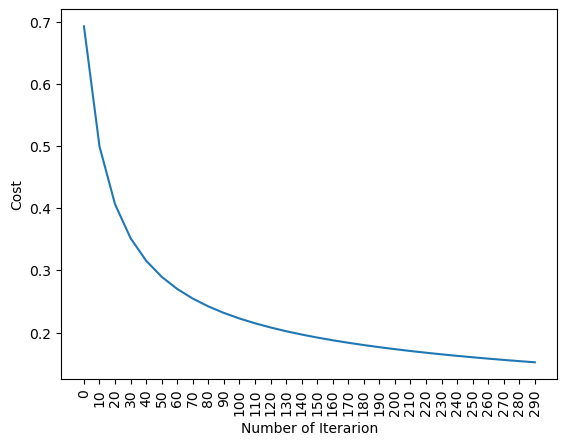

test accuracy: 96.49122807017544 %


In [86]:

# %% logistic_regression
# y train w ve b'yi update edebilmesi için gereklidir.
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    # forward backward çağırmak yerine updata çağırıyorum ki o da zaten forward backward çağırıyor.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)  # bunu for döngüsü içinde döndürürsek en yüksek accuracy değerini  bulabiliriz


In [88]:
#%% sklearn with LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))


test accuracy 0.9824561403508771


In [ ]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)